In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from decisiontree_table_converter.converter import tree_to_decision_table

In [19]:
df = pd.read_csv('car_evaluation.csv') 

In [20]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [22]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

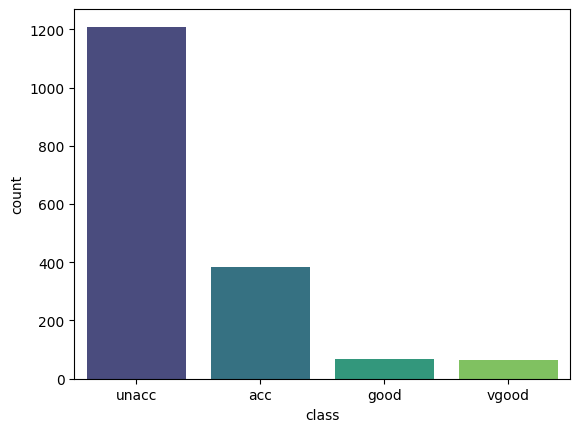

In [23]:
sns.countplot(data=df, x='class', palette='viridis', order=df['class'].value_counts().index)


In [24]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [25]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


In [26]:
param_grid = {'max_depth': range(1, 15)}


clf = DecisionTreeClassifier(criterion='gini',random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_depth = grid_search.best_params_['max_depth']
print(f"Optimal max_depth: {best_depth}")

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Optimal max_depth: 11
Test Accuracy: 0.9624277456647399


In [27]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=10 ,random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [28]:
y_pred_gini = clf.predict(X_test)
accuracy_score(y_test, y_pred_gini)

y_pred_train_gini = clf.predict(X_train)
accuracy_score(y_train, y_pred_train_gini)



print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9913
Test set score: 0.9566


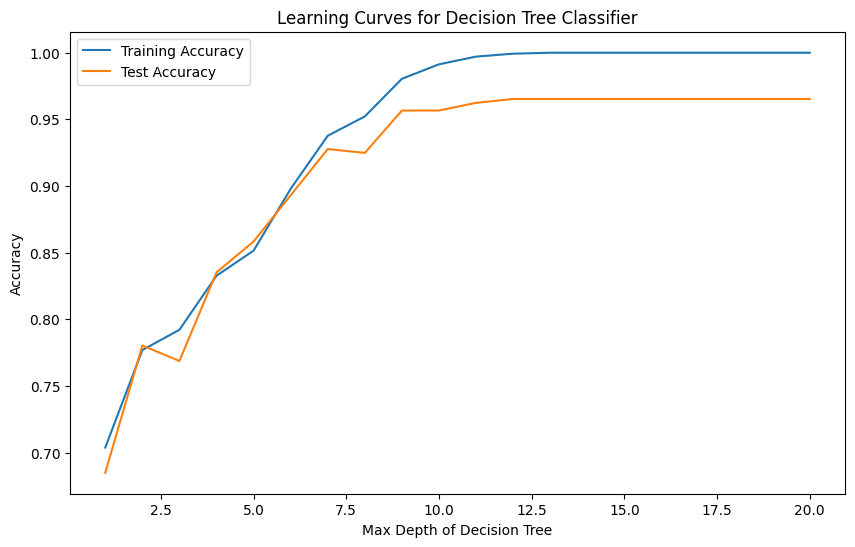

In [29]:
train_accuracies = []
test_accuracies = []

max_depths = range(1, 21)

for depth in max_depths:
    # Create and fit the model
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predict and calculate accuracy on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Decision Tree Classifier')
plt.legend()
plt.show()


In [30]:
cm = confusion_matrix(y_test, y_pred_gini)
print(cm)

[[ 70   3   3   1]
 [  3  12   0   0]
 [  2   0 235   0]
 [  1   2   0  14]]


In [31]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.92      0.91      0.92        77
        good       0.71      0.80      0.75        15
       unacc       0.99      0.99      0.99       237
       vgood       0.93      0.82      0.87        17

    accuracy                           0.96       346
   macro avg       0.89      0.88      0.88       346
weighted avg       0.96      0.96      0.96       346



[Text(0.46105072463768115, 0.9545454545454546, 'safety <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]\nclass = unacc'),
 Text(0.44655797101449274, 0.8636363636363636, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]\nclass = unacc'),
 Text(0.47554347826086957, 0.8636363636363636, 'persons <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]\nclass = unacc'),
 Text(0.46105072463768115, 0.7727272727272727, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]\nclass = unacc'),
 Text(0.490036231884058, 0.7727272727272727, 'maint <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]\nclass = acc'),
 Text(0.22826086956521738, 0.6818181818181818, 'buying <= 1.5\ngini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]\nclass = unacc'),
 Text(0.213768115942029, 0.5909090909090909, 'gini = 0.0\nsamples = 77\nvalue = [0, 0, 77, 0]\nclass = unacc'),
 Text(0.2427536231884058, 0.5909090909090909, 'buying <= 3.5\ngini = 0.503\nsamples = 224\nvalue = [136, 0, 80, 8

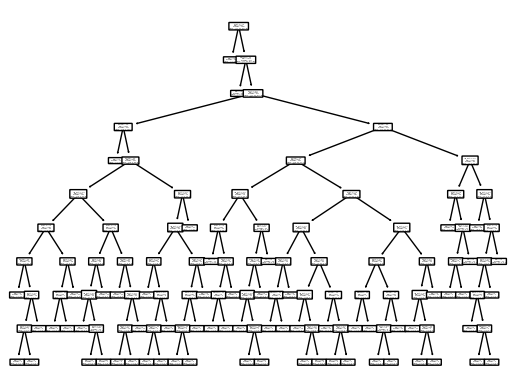

In [42]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=10 ,random_state=42)
clf.fit(X_train, y_train)
feature_names = X.columns.tolist()
class_names = clf.classes_


tree.plot_tree(clf.fit(X_train, y_train),feature_names= X.columns ,class_names = class_names , rounded=True) 

In [ ]:
decision_table_df=tree_to_decision_table(clf, feature_names, class_names)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
buying,-,-,<= 1.50,(1.50; 2.50],(2.50; 3.50],(2.50; 3.50],(2.50; 3.50],(1.50; 3.50],(1.50; 3.50],(1.50; 3.50],...,> 3.50,> 3.50,> 3.50,> 3.50,> 3.50,> 3.50,> 3.50,> 3.50,> 3.50,> 3.50
maint,-,-,<= 2.50,<= 2.50,<= 1.50,<= 1.50,(1.50; 2.50],<= 2.50,<= 2.50,<= 2.50,...,> 2.50,> 2.50,> 2.50,> 2.50,> 2.50,> 2.50,> 2.50,> 2.50,> 2.50,> 2.50
doors,-,-,-,-,<= 1.50,> 1.50,-,<= 1.50,<= 1.50,> 1.50,...,-,<= 1.50,<= 1.50,> 1.50,-,<= 1.50,(1.50; 2.50],(1.50; 2.50],> 2.50,-
persons,-,<= 1.50,> 1.50,> 1.50,> 1.50,> 1.50,> 1.50,(1.50; 2.50],> 2.50,> 1.50,...,> 1.50,(1.50; 2.50],> 2.50,> 1.50,> 1.50,> 1.50,(1.50; 2.50],> 2.50,> 1.50,> 1.50
lug_boot,-,-,-,<= 1.50,<= 1.50,<= 1.50,<= 1.50,<= 1.50,<= 1.50,<= 1.50,...,<= 1.50,<= 1.50,<= 1.50,<= 1.50,(1.50; 2.50],> 2.50,> 2.50,> 2.50,> 2.50,> 2.50
safety,<= 1.50,> 1.50,> 1.50,(1.50; 2.50],(1.50; 2.50],(1.50; 2.50],(1.50; 2.50],> 2.50,> 2.50,> 2.50,...,(1.50; 2.50],> 2.50,> 2.50,> 2.50,> 1.50,(1.50; 2.50],(1.50; 2.50],(1.50; 2.50],(1.50; 2.50],> 2.50
Class,unacc,unacc,unacc,unacc,acc,acc,unacc,acc,unacc,acc,...,unacc,acc,unacc,acc,acc,unacc,unacc,acc,acc,acc


In [ ]:
decision_table_df.to_csv('CarEvaluation_DecisionTable.csv')